In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat


In [2]:
class square:
    def __init__(self, tl, br):
        self.top_left = tl
        self.bottom_right = br
        self.transform()
        
    def transform(self):
        self.ll = [self.top_left[0], self.bottom_right[1]]
        self.width = self.bottom_right[0] - self.top_left[0]
        self.height = self.top_left[1] - self.bottom_right[1]
        

obs1 = square([1,9], [3,7])
obs2 = square([9,3], [10,-10])
obs3 = square([2,0], [4,-3])
obs4 = square([8,9], [9,7])

play_ground = square([0,10], [10,-10])
start = [5,-9]
goal = [0,10]

In [3]:
path = np.loadtxt('build/unit_tests/path.csv')
print(path)

[[ 0.       10.      ]
 [ 0.212357  9.98805 ]
 [ 1.21078   9.93184 ]
 [ 2.20919   9.87564 ]
 [ 2.74169   9.12665 ]
 [ 3.42711   8.90714 ]
 [ 3.54314   8.99449 ]
 [ 3.94355   8.47473 ]
 [ 3.50264   7.68459 ]
 [ 3.48013   6.77903 ]
 [ 2.95819   5.92604 ]
 [ 3.6249    5.18072 ]
 [ 4.60989   5.00809 ]
 [ 4.90809   4.05358 ]
 [ 5.01576   3.05939 ]
 [ 5.79569   3.68526 ]
 [ 6.64048   3.15016 ]
 [ 6.73503   2.26104 ]
 [ 6.95521   1.28558 ]
 [ 7.32727   0.357368]
 [ 6.71788  -0.435503]
 [ 6.56716  -1.42408 ]
 [ 6.29883  -2.26958 ]
 [ 6.50858  -3.24734 ]
 [ 6.3017   -4.2257  ]
 [ 5.79288  -5.08658 ]
 [ 5.63429  -6.07392 ]
 [ 5.49746  -7.06451 ]
 [ 5.20989  -8.02228 ]
 [ 5.       -9.      ]]


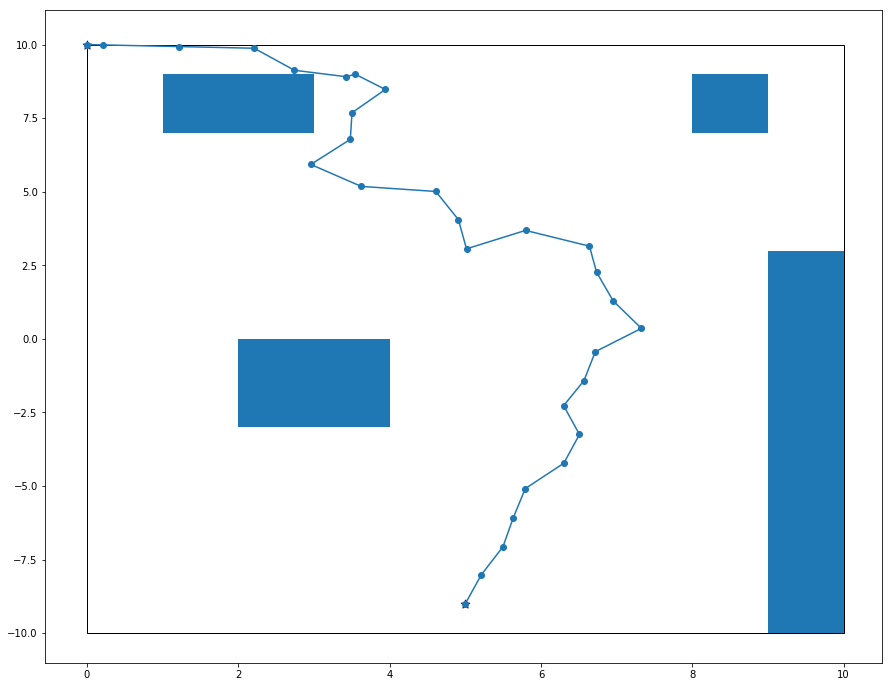

In [13]:
fig, ax = plt.subplots(figsize=[15,12])
ax.add_patch(pat.Rectangle(play_ground.ll, play_ground.width, play_ground.height, fill=False))
ax.add_patch(pat.Rectangle(obs1.ll, obs1.width, obs1.height))
ax.add_patch(pat.Rectangle(obs2.ll, obs2.width, obs2.height))
ax.add_patch(pat.Rectangle(obs3.ll, obs3.width, obs3.height))
ax.add_patch(pat.Rectangle(obs4.ll, obs4.width, obs4.height))

plt.scatter(start[0], start[1], c=3, s=80, marker='*')
plt.scatter(goal[0], goal[1], c=3, s=80, marker='*')
plt.plot(path[:,0], path[:,1], '-o')

plt.show()


